Лабораторна робота №1

з предмету «Вступ до машинного навчання»

студента групи ДА-21 Терещенка Олексія


In [48]:
import requests
import numpy as np
import io
import matplotlib.pyplot as plt

Дістаємо дані з хмарного сховища


In [49]:
def load_data_from_url(url):
    response = requests.get(url)

    if response.status_code == 200:
        csv_data = io.StringIO(response.text)

        data = np.genfromtxt(csv_data, delimiter=",", skip_header=1)

        x = data[:, 1]
        y = data[:, 2]
        return x, y
    else:
        raise Exception(f"Error loading data, status code: {response.status_code}")


train_url = (
    "https://drive.google.com/uc?export=download&id=1ZJ7USoXN5Iijv_j-o8igJKD6w5jr5QPF"
)
test_url = (
    "https://drive.google.com/uc?export=download&id=1Dtf7FRjjhAGEikPFYYXmBBEdFFFWa-kK"
)

x_train, y_train = load_data_from_url(train_url)
x_test, y_test = load_data_from_url(test_url)

In [50]:
def print_data(x, y, data_name="Дані"):
    print(f"\n{data_name}:\n")
    print(f"{'Індекс':<8} | {'X':<12} | {'Y':<12}")
    print("-" * 35)
    for i in range(min(len(x), 10)):
        print(f"{i:<8} | {x[i]:<12.5f} | {y[i]:<12.5f}")
    if len(x) > 10:
        print(f"\n... (всього {len(x)} рядків)")


print_data(x_train, y_train, "Тренувальні дані")


Тренувальні дані:

Індекс   | X            | Y           
-----------------------------------
0        | 0.00000      | 20.14901    
1        | 0.01010      | 19.97872    
2        | 0.02020      | 20.23471    
3        | 0.03030      | 20.51752    
4        | 0.04040      | 20.01056    
5        | 0.05051      | 20.03077    
6        | 0.06061      | 20.59498    
7        | 0.07071      | 20.37164    
8        | 0.08081      | 20.02077    
9        | 0.09091      | 20.34459    

... (всього 60 рядків)


Графічна візуалізація даних:


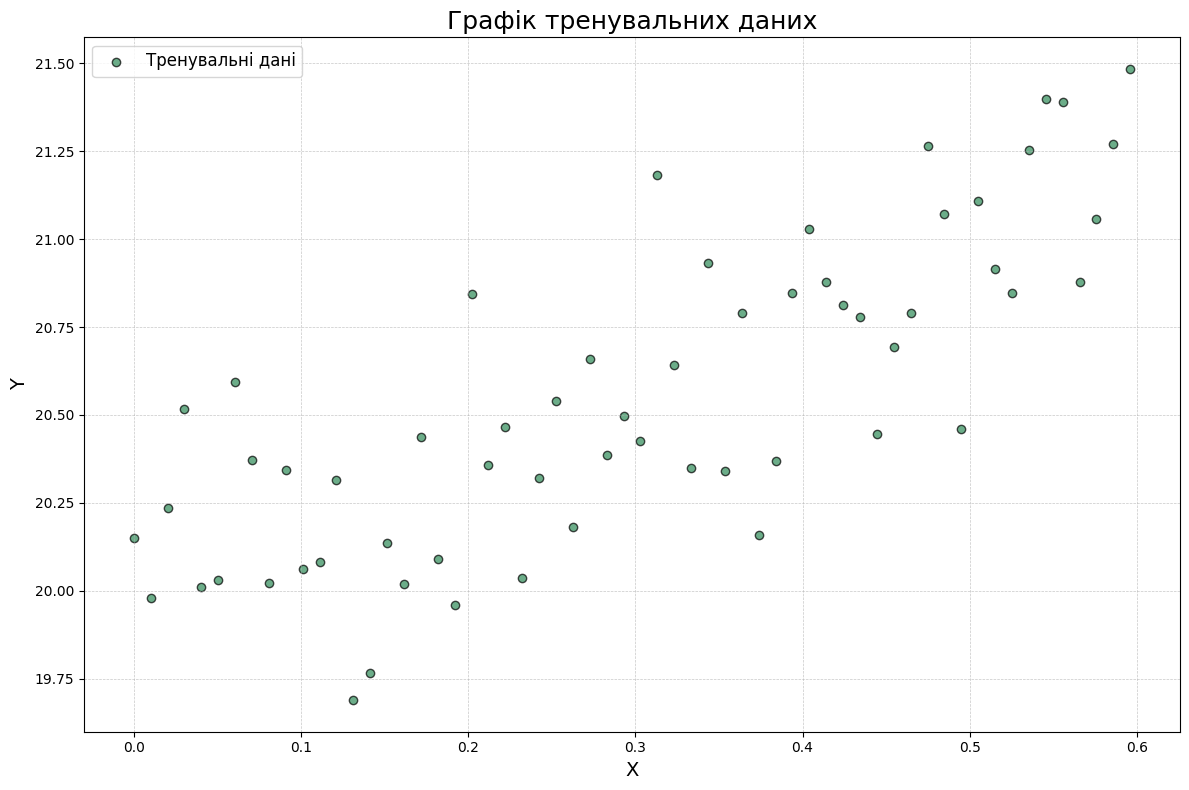

In [51]:
def plot_data(x_train, y_train):
    plt.figure(figsize=(12, 8))

    plt.scatter(
        x_train,
        y_train,
        color="#2E8B57",
        label="Тренувальні дані",
        marker="o",
        edgecolor="black",
        alpha=0.7,
    )

    plt.xlabel("X", fontsize=14)
    plt.ylabel("Y", fontsize=14)
    plt.title("Графік тренувальних даних", fontsize=18)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()



plot_data(x_train, y_train)

Градієнтний спуск


In [52]:
m = len(y_train)


def predict_values(x, weight_0, weight_1):
    return weight_1 * x + weight_0


def calculate_mse(x, y, weight_1, weight_0):
    y_pred = weight_1 * x + weight_0
    mse = np.mean((y - y_pred) ** 2)
    return mse


def perform_gradient_descent(
    x_values, y_values, weight_0, weight_1, learning_rate, num_epochs
):
    m = len(y_values)
    cost_history = []
    weight_0_history = []
    weight_1_history = []

    for epoch in range(num_epochs):
        y_pred = predict_values(x_values, weight_0, weight_1)
        loss = ((y_pred - y_values) ** 2).mean()
        weight_1_grad = (-2 / m) * np.sum(x_values * (y_values - y_pred))
        weight_0_grad = (-2 / m) * np.sum(y_values - y_pred)
        weight_1 -= learning_rate * weight_1_grad
        weight_0 -= learning_rate * weight_0_grad

        mse = calculate_mse(x_values, y_values, weight_1, weight_0)
        cost_history.append(mse)
        weight_0_history.append(weight_0)
        weight_1_history.append(weight_1)

    return weight_1, weight_0, cost_history, weight_0_history, weight_1_history


initial_weight_0 = 0
initial_weight_1 = 0
alpha = 0.01
epochs = 10000

weight_1, weight_0, cost_history, weight_0_history, weight_1_history = (
    perform_gradient_descent(
        x_train, y_train, initial_weight_0, initial_weight_1, alpha, epochs
    )
)

Таблиця змін коефіцієнтів та функції втрат:


In [53]:
print(f"{'Epoch':<10} | {'Weight_0':<15} | {'Weight_1':<15} | {'Cost':<15}")
print("-" * 61)
for epoch in range(len(cost_history)):
    print(
        f"{epoch:<10} | {weight_0_history[epoch]:<15.5f} | {weight_1_history[epoch]:<15.5f} | {cost_history[epoch]:<15.5f}"
    )

Epoch      | Weight_0        | Weight_1        | Cost           
-------------------------------------------------------------
0          | 0.41099         | 0.12368         | 404.25742      
1          | 0.81303         | 0.24461         | 386.82412      
2          | 1.20630         | 0.36286         | 370.14353      
3          | 1.59100         | 0.47848         | 354.18315      
4          | 1.96732         | 0.59154         | 338.91188      
5          | 2.33544         | 0.70208         | 324.29997      
6          | 2.69554         | 0.81016         | 310.31895      
7          | 3.04779         | 0.91584         | 296.94157      
8          | 3.39237         | 1.01917         | 284.14178      
9          | 3.72944         | 1.12020         | 271.89463      
10         | 4.05917         | 1.21897         | 260.17627      
11         | 4.38171         | 1.31555         | 248.96386      
12         | 4.69723         | 1.40997         | 238.23555      
13         | 5.00587        

Візуалізація результатів


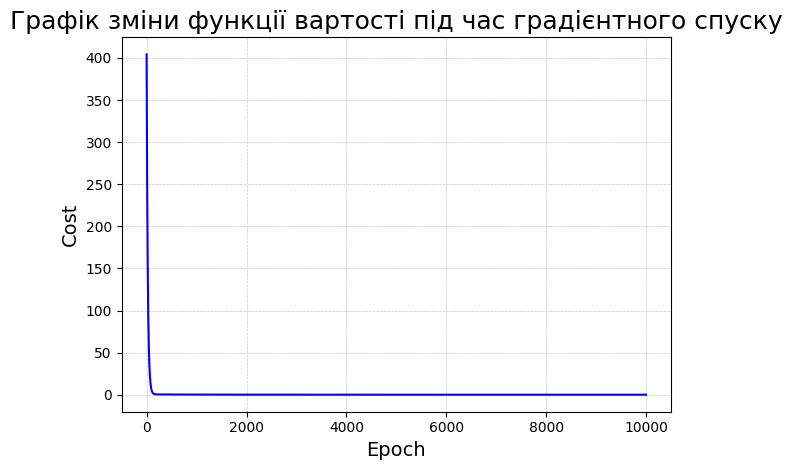

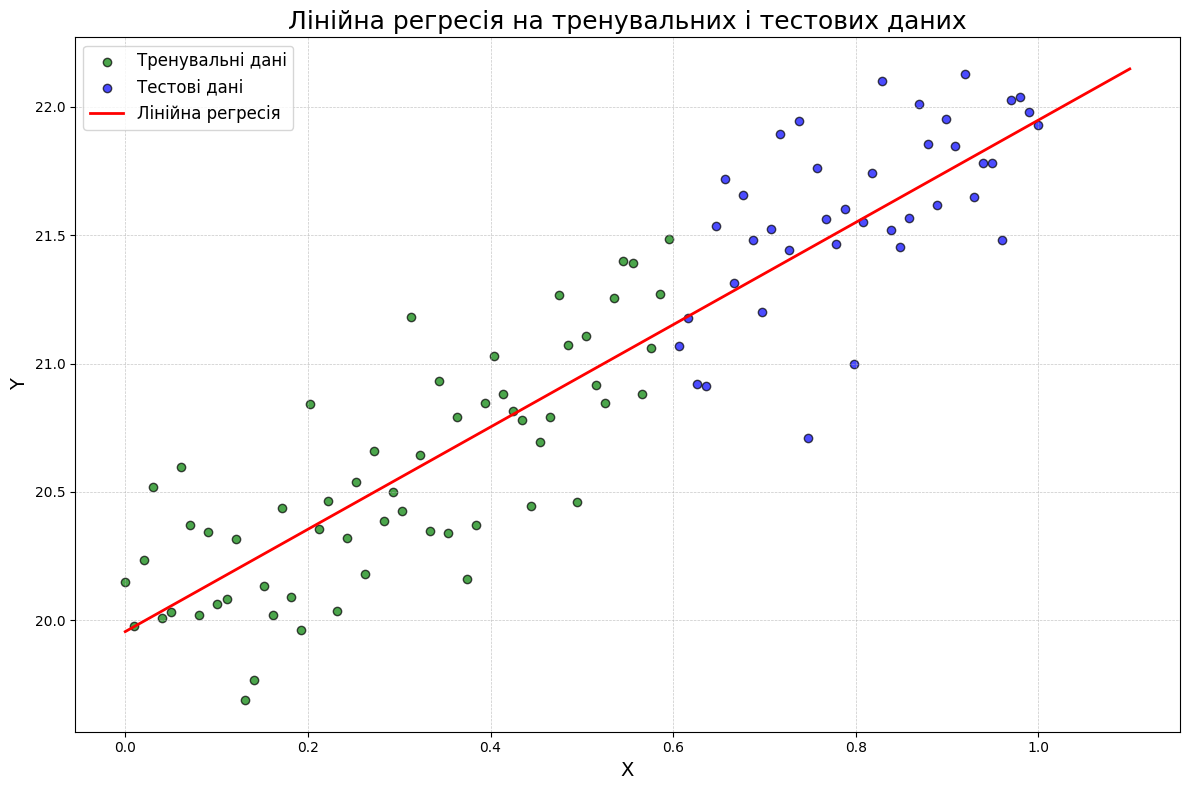

In [57]:
plt.plot(cost_history, color="blue")
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Графік зміни функції вартості під час градієнтного спуску", fontsize=18)
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

x = np.linspace(0, 1.1, 100)
plt.figure(figsize=(12, 8))
plt.scatter(
    x_train,
    y_train,
    color="green",
    label="Тренувальні дані",
    marker="o",
    edgecolor="black",
    alpha=0.7,
)
plt.scatter(
    x_test,
    y_test,
    color="blue",
    label="Тестові дані",
    marker="o",
    edgecolor="black",
    alpha=0.7,
)
plt.plot(x, weight_1 * x + weight_0, color="red", label="Лінійна регресія", linewidth=2)
plt.xlabel("X", fontsize=14)
plt.ylabel("Y", fontsize=14)
plt.title("Лінійна регресія на тренувальних і тестових даних", fontsize=18)
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

Висновок:
Було знайдено розв'язок за допомогою методу лінійної регресії, що дозволяє передбачати значення цільової змінної (target) на основі значення ознаки (feature). Варто зазначити, що ефективність та точність моделі значною мірою залежать від таких гіперпараметрів, як кількість епох та швидкість навчання (learning rate).
